<a href="https://colab.research.google.com/github/dcher95/universe7/blob/pytorch/pytorch/zero_to_mastery/02_pytorch_classification-exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. PyTorch Classification Exercises

In [14]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 13.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [1]:
# Import torch
import torch

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Setup random seed
RANDOM_SEED = 42

## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors.
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [4]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000,
    noise=0.03,
    random_state=42,
)

In [6]:
# Turn data into a DataFrame
# import pandas as pd

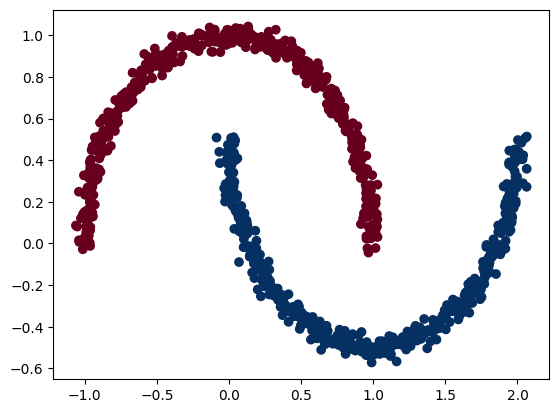

In [7]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [8]:
# Turn data into tensors of dtype float
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)

## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [20]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
      super().__init__()
      self.linear_layer_stack = nn.Sequential(
          nn.Linear(in_features=input_features, out_features=hidden_units),
          nn.ReLU(),
          nn.Linear(in_features=hidden_units, out_features=hidden_units),
          nn.ReLU(),
          nn.Linear(in_features=hidden_units, out_features=output_features),
      )

  def forward(self, x):
        return self.linear_layer_stack(x)

input_features = 2
output_features = 1

# Instantiate the model
model_0 = MoonModelV0(input_features, output_features).to(device)
model_0

MoonModelV0(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=1, bias=True)
  )
)

## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [22]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss()

# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [23]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
!pip -q install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: Uncomment this code to use the Accuracy function
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn

MulticlassAccuracy()

In [24]:
torch.manual_seed(42)
epochs = 1000

# Send data to the device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Initialize the accuracy metric
train_accuracy = Accuracy(task = 'binary').to(device)
test_accuracy = Accuracy(task = 'binary').to(device)

# Loop through the data
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass (logits output)
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #2. Calculate loss and accuracy
  loss = loss_fn(y_logits, y_train) # Using nn.BCEWithLogitsLoss works with raw logits
  train_accuracy.update(y_pred, y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Loss backward
  loss.backward()

  #5. Optimizer step
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass (to get the logits)
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Caculate the test loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_accuracy.update(test_pred, y_test)

  # Compute accuracy for this epoch
  epoch_train_acc = train_accuracy.compute()
  epoch_test_acc = test_accuracy.compute()

  train_accuracy.reset()
  test_accuracy.reset()

  # Print out what's happening every 10 epochs
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {epoch_train_acc:.2f} | Test Loss: {test_loss:.5f}, Test Acc: {epoch_test_acc:.2f}")

Epoch: 0 | Loss: 0.71197, Acc: 0.50 | Test Loss: 0.70553, Test Acc: 0.50
Epoch: 10 | Loss: 0.69019, Acc: 0.61 | Test Loss: 0.68803, Test Acc: 0.64
Epoch: 20 | Loss: 0.67914, Acc: 0.80 | Test Loss: 0.67866, Test Acc: 0.84
Epoch: 30 | Loss: 0.66625, Acc: 0.84 | Test Loss: 0.66679, Test Acc: 0.85
Epoch: 40 | Loss: 0.64676, Acc: 0.82 | Test Loss: 0.64839, Test Acc: 0.82
Epoch: 50 | Loss: 0.61732, Acc: 0.81 | Test Loss: 0.62059, Test Acc: 0.81
Epoch: 60 | Loss: 0.57528, Acc: 0.81 | Test Loss: 0.58076, Test Acc: 0.81
Epoch: 70 | Loss: 0.52059, Acc: 0.82 | Test Loss: 0.52883, Test Acc: 0.81
Epoch: 80 | Loss: 0.46007, Acc: 0.83 | Test Loss: 0.47091, Test Acc: 0.82
Epoch: 90 | Loss: 0.40430, Acc: 0.84 | Test Loss: 0.41701, Test Acc: 0.82
Epoch: 100 | Loss: 0.36094, Acc: 0.85 | Test Loss: 0.37427, Test Acc: 0.83
Epoch: 110 | Loss: 0.32957, Acc: 0.85 | Test Loss: 0.34239, Test Acc: 0.85
Epoch: 120 | Loss: 0.30680, Acc: 0.86 | Test Loss: 0.31840, Test Acc: 0.85
Epoch: 130 | Loss: 0.28979, Acc: 0.8

In [25]:
# What's coming out of our model?

# logits (raw outputs of model)
print("Logits:")
print(test_logits)

# Prediction probabilities
print("Pred probs:")
print(torch.sigmoid(test_logits))

# Prediction labels
print("Pred labels:")
print(test_pred)

Logits:
tensor([ 5.5448, -6.0320,  5.5481, -6.5611,  6.8397,  6.0999, -3.6751, -1.7990,
         5.6288, -5.5528, -5.8285,  5.5623, -3.0257,  6.6763, -3.7433,  2.4693,
         4.9328, -5.8185,  5.1482, -5.5229, -5.9629, -2.6179,  4.7962, -5.7863,
        -4.3023, -2.6543, -5.1814, -4.1227, -3.7548,  6.4870,  3.7596, -4.6890,
        -5.2873,  7.2576, -6.0950,  5.4013,  5.0161,  5.8154,  7.5572,  6.4588,
         4.5527,  4.5885,  5.0760, -5.3083, -5.5662,  5.1874, -5.1540, -6.2590,
         6.2909,  6.4841, -5.7833, -6.1015, -4.2342, -5.5622,  2.2994, -5.5927,
         1.7813,  5.7727,  4.2583, -4.2715,  5.9552, -2.5464, -4.3781,  6.4511,
         5.7218,  5.7394,  2.8973, -2.4290, -5.2867, -3.4723,  4.7572, -5.6023,
        -3.5974,  4.7355,  0.6347,  4.6799,  7.0493, -3.9844, -5.8797,  3.7759,
        -4.9225,  5.7783, -2.2417,  7.0974,  4.1534,  4.5076, -4.6421, -5.3985,
        -5.7772, -2.8633,  5.1906,  7.2011,  6.7361,  6.7923,  5.8817, -5.6681,
         5.9387,  4.1935, -4.971

## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [27]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

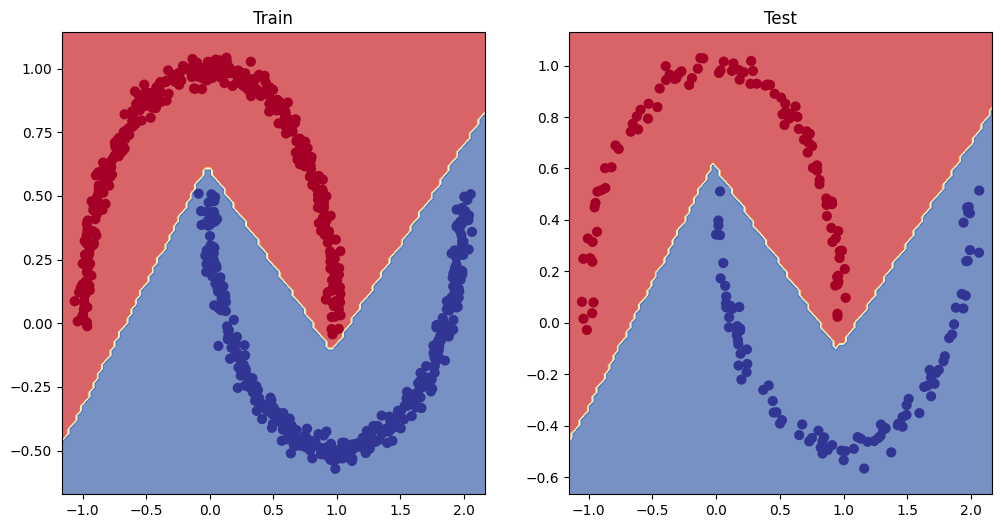

In [28]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

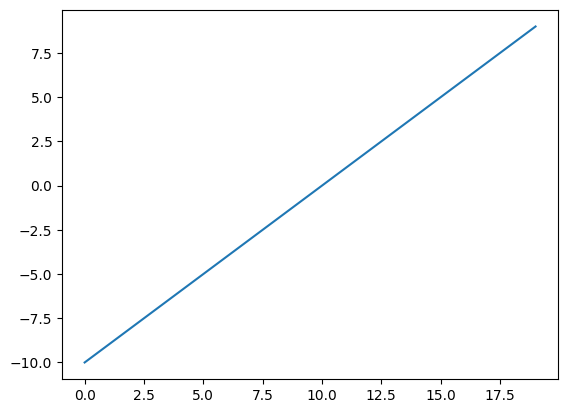

In [33]:
# Create a straight line tensor
straight_line = torch.arange(-10, 10, 1, dtype=torch.float32)
plt.plot(straight_line)

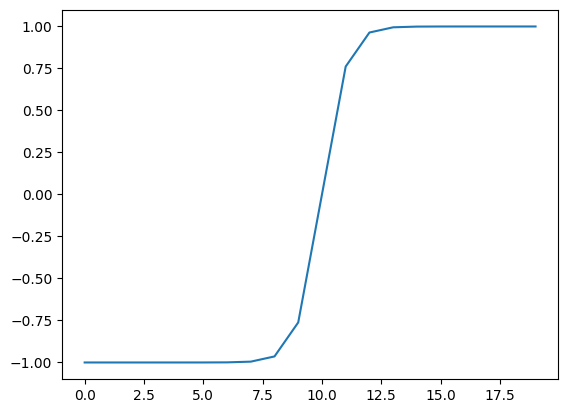

In [38]:
# Test torch.tanh() on the tensor and plot it
plt.plot(torch.tanh(straight_line))

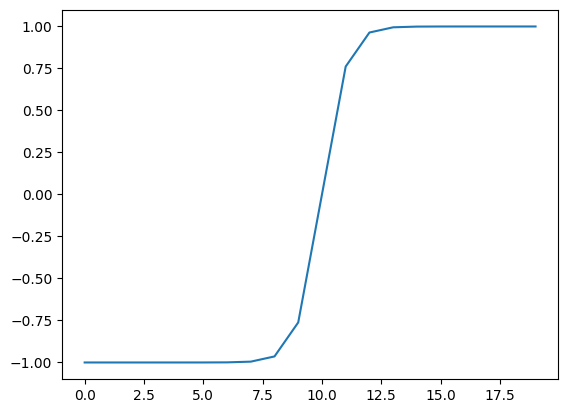

In [39]:
# Replicate torch.tanh() and plot it
def tanh(x):
  return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

# Test custom sigmoid on toy tensor
plt.plot(tanh(straight_line))

## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

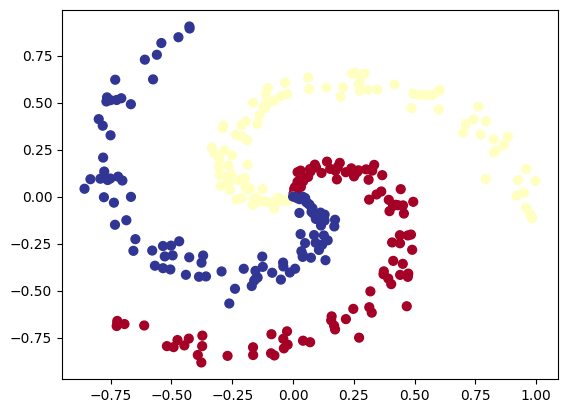

In [56]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [57]:
# Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
    y,
    test_size=0.2,
    random_state=RANDOM_SEED
)


In [58]:
# Let's calculuate the accuracy for when we fit our model
!pip -q install torchmetrics # colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: uncomment the two lines below to send the accuracy function to the device
acc_fn = Accuracy(task="multiclass", num_classes=4).to(device)
acc_fn

MulticlassAccuracy()

In [59]:
# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create model by subclassing nn.Module
class SpiralModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features),
        )

  def forward(self, x):
    return self.linear_layer_stack(x)

# Instantiate model and send it to device
model_1 = SpiralModel(input_features=2, output_features=3).to(device)
model_1


SpiralModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=3, bias=True)
  )
)

In [60]:
model_1(X_train.to(device))

# Print out first 10 untrained model outputs (forward pass)
print("Logits:")
y_logits = model_1(X_test.to(device))
print(y_logits[0])

print("Pred probs:")
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_pred_probs[0])

print("Pred labels:")
print(torch.argmax(y_pred_probs[0]))

Logits:
tensor([-0.0732, -0.3827, -0.2453], device='cuda:0', grad_fn=<SelectBackward0>)
Pred probs:
tensor([0.3882, 0.2849, 0.3269], device='cuda:0', grad_fn=<SelectBackward0>)
Pred labels:
tensor(0, device='cuda:0')


In [61]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(),
                            lr=0.01)

In [62]:
# Build a training loop for the model

# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Initialize the accuracy metric
train_accuracy = Accuracy(task = 'multiclass', num_classes=3).to(device)
test_accuracy = Accuracy(task = 'multiclass', num_classes=3).to(device)

# Loop over data
for epoch in range(epochs):
  ### Training
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train)
  train_accuracy.update(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ## Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    # 2. Caculate loss and acc
    test_loss = loss_fn(test_logits, y_test)
    test_accuracy.update(test_pred, y_test)

  # Compute accuracy for this epoch
  epoch_train_acc = train_accuracy.compute()
  epoch_test_acc = test_accuracy.compute()

  train_accuracy.reset()
  test_accuracy.reset()

  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {epoch_train_acc:.2f} | Test Loss: {test_loss:.5f}, Test Acc: {epoch_test_acc:.2f}")


Epoch: 0 | Loss: 1.10245, Acc: 0.32 | Test Loss: 1.08451, Test Acc: 0.37
Epoch: 100 | Loss: 0.44643, Acc: 0.78 | Test Loss: 0.43383, Test Acc: 0.82
Epoch: 200 | Loss: 0.14284, Acc: 0.95 | Test Loss: 0.12733, Test Acc: 0.97
Epoch: 300 | Loss: 0.08672, Acc: 0.97 | Test Loss: 0.06026, Test Acc: 1.00
Epoch: 400 | Loss: 0.05964, Acc: 0.98 | Test Loss: 0.03147, Test Acc: 1.00
Epoch: 500 | Loss: 0.04837, Acc: 0.99 | Test Loss: 0.02561, Test Acc: 1.00
Epoch: 600 | Loss: 0.04070, Acc: 0.99 | Test Loss: 0.01609, Test Acc: 1.00
Epoch: 700 | Loss: 0.03550, Acc: 0.99 | Test Loss: 0.00906, Test Acc: 1.00
Epoch: 800 | Loss: 0.03177, Acc: 0.99 | Test Loss: 0.00633, Test Acc: 1.00
Epoch: 900 | Loss: 0.02870, Acc: 0.99 | Test Loss: 0.00500, Test Acc: 1.00


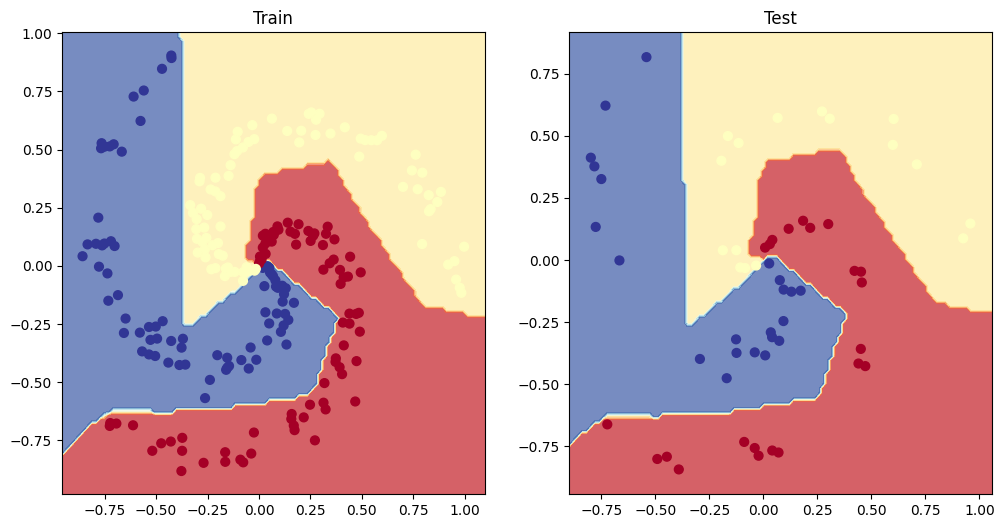

In [63]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

